In [1126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

# Show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [1127]:
df = pd.read_csv('data/data.csv', sep=';', index_col=0)

In [1129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 1 to 137
Data columns (total 94 columns):
ID                               137 non-null int64
Gender                           137 non-null int64
Age                              137 non-null int64
Education_lev                    137 non-null int64
fluidIQ                          137 non-null object
Emotional.Stability..N.          137 non-null object
Carefreeness..N1.                137 non-null object
Equanimity..N2.                  137 non-null object
Positive.mood..N3.               137 non-null object
Self.consciousness..N4.          137 non-null object
Self.control..N5.                137 non-null object
Emot..robustness..N6.            137 non-null object
Extraversion..E.                 137 non-null object
Friendliness..E1.                137 non-null object
Sociableness..E2.                137 non-null object
Assertiveness..E3.               137 non-null object
Dynamism..E4.                    137 non-null objec

In [1130]:
# Convert to float (pandas detect point as the separator for floats instead of comma)
for column_index in range(0,len(df.columns)):
    name = df.columns[column_index]
    if df[name].dtype == np.object:
        df[name] = df[name].str.replace(',', '.').astype(float)

In [1131]:
df.shape

(137, 94)

In [1132]:
df.head(10)

,ID,Gender,Age,Education_lev,fluidIQ,Emotional.Stability..N.,Carefreeness..N1.,Equanimity..N2.,Positive.mood..N3.,Self.consciousness..N4.,Self.control..N5.,Emot..robustness..N6.,Extraversion..E.,Friendliness..E1.,Sociableness..E2.,Assertiveness..E3.,Dynamism..E4.,Adventurousness...E5.,Cheerfulness..E6.,Openness..O.,Openn..to.imagin...O1.,Openn..to.aesth...O2.,Openn..to.feel...O3.,Openn..to.actions..O4.,Openn..to.ideas..O5.,Openn..to.val..norm...O6.,Conscientiousness..C.,Competence..C1.,Love.of.order..C2.,Sense.of.duty..C3.,Ambition..C4.,Discipline..C5.,Caution..C6.,Agreeableness..A.,Willingness.to.trust..A1.,Genuineness..A2.,Helpfulness..A3.,Obligingness..A4.,Modesty..A5.,Good.naturedness..A6.,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics,mydatatest.avg_duration_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics
1,11304,1,23,4,0.7251,-0.9334,-1.230,-0.357,-0.720,-0.335,0.110,-0.688,-1.0278,-1.068,0.247,1.235,-0.359,-1.081,-1.438,-1.0703,0.576,-0.475,-0.517,-0.563,1.290,-1.608,-0.8548,-0.236,1.687,-0.828,0.341,0.020,0.834,-1.4482,-0.032,0.154,-0.764,-1.027,-1.082,-0.788,120,414,0,40,51,553,0,8,31,260,52,1930,3,128,113,0,11,1,7,153,0,184,231,176,1,8,0,80.508333,19.989234,0.000000,474.149741,66.142812,27.299807,0.000000,63.482948,5.594866,22.306456,62.541808,60.222363,102.000000,66.640780,19.273367,0.000000,35.316076,4.000000,60.666667,55.469027,0.000000,124.447371,72.502856,125.382997,140.000000,0.000000,0.0
2,11491,1,21,4,0.9921,1.1622,0.993,2.520,1.323,0.562,1.799,5.526,-1.1607,-1.488,-1.798,2.043,-1.182,0.554,-1.222,0.1221,1.558,-0.475,-5.648,0.917,5.515,1.332,1.0258,4.435,0.905,2.401,4.040,4.552,2.401,-2.1099,-1.156,-0.562,-2.474,-0.404,-1.082,-2.993,98,239,3,0,21,88,0,4,42,113,23,3430,5,19,4,0,0,7,0,34,0,0,187,0,1,211,0,176.214286,21.201236,77.000000,0.000000,292.695366,29.823646,0.000000,0.000000,2.149066,16.753147,90.804380,42.197411,52.000000,53.702947,0.000000,0.000000,0.000000,24.285714,0.000000,74.587645,0.000000,0.000000,95.829110,0.000000,0.000000,82.581954,0.0
3,12552,2,22,5,0.5541,-1.6827,-2.016,-2.303,-2.371,0.562,-1.045,-1.484,-0.2877,0.082,2.391,-2.005,2.375,1.438,-0.309,0.1810,1.058,0.288,0.284,2.849,2.513,0.940,-1.1241,-1.872,-0.732,1.782,0.936,-0.227,-1.114,-0.1796,1.875,3.585,0.471,-0.616,2.202,-0.264,226,135,0,347,6,75,0,9,6,40,19,1068,12,20,2,0,69,3,0,47,0,0,101,0,0,277,0,84.902655,27.019119,0.000000,178.964202,0.000000,32.312866,0.000000,95.700334,5.062647,38.577362,39.389153,25.361692,35.660060,149.456141,20.000000,0.000000,239.753781,3.666667,0.000000,65.977454,0.000000,0.000000,86.099052,0.000000,0.000000,78.253432,0.0
4,13275,2,34,5,0.7387,-0.9873,-0.470,-0.580,-0.190,-0.815,-0.334,-0.430,-0.8691,1.370,-0.749,0.228,-1.182,0.107,-0.309,-0.4643,0.343,-0.018,1.280,1.180,1.003,0.568,-1.4071,-0.651,-0.958,-0.430,-1.159,-0.227,-0.226,-0.8839,0.653,0.615,-0.059,-0.186,0.093,0.389,89,157,0,0,41,75,2,4,3625,102,0,3140,256,108,21,0,0,9,0,3,108,0,263,53,4,118,0,35.314607,20.677723,0.000000,0.000000,84.173028,31.069522,99.000000,0.000000,3.227029,17.030655,0.000000,41.059489,30.193285,42.857908,15.253427,0.000000,0.000000,11.405742,0.000000,2.000000,28.180582,0.000000,50.146309,37.600068,0.000000,63.630655,0.0
5,13604,2,23,4,0.9785,0.1927,0.510,0.696,1.079,1.410,0.533,1.020,0.3674,0.850,2.692

In [1133]:
df.describe()

,ID,Gender,Age,Education_lev,fluidIQ,Emotional.Stability..N.,Carefreeness..N1.,Equanimity..N2.,Positive.mood..N3.,Self.consciousness..N4.,Self.control..N5.,Emot..robustness..N6.,Extraversion..E.,Friendliness..E1.,Sociableness..E2.,Assertiveness..E3.,Dynamism..E4.,Adventurousness...E5.,Cheerfulness..E6.,Openness..O.,Openn..to.imagin...O1.,Openn..to.aesth...O2.,Openn..to.feel...O3.,Openn..to.actions..O4.,Openn..to.ideas..O5.,Openn..to.val..norm...O6.,Conscientiousness..C.,Competence..C1.,Love.of.order..C2.,Sense.of.duty..C3.,Ambition..C4.,Discipline..C5.,Caution..C6.,Agreeableness..A.,Willingness.to.trust..A1.,Genuineness..A2.,Helpfulness..A3.,Obligingness..A4.,Modesty..A5.,Good.naturedness..A6.,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics,mydatatest.avg_duration_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,54616.875912,1.635036,23.576642,4.262774,0.631851,-0.042369,0.030613,0.484299,0.917080,0.718314,0.703993,0.675029,0.028110,1.424715,1.348635,0.794533,1.373861,0.438277,1.818153,0.014118,1.295854,0.338891,2.098730,1.505277,1.882343,0.930080,0.078236,1.047380,1.211854,2.204343,2.202387,1.773051,1.776854,-0.155520,0.232226,0.997241,1.595482,0.887182,0.581350,1.914555,248.408759,441.299270,13.328467,151.430657,64.985401,207.175182,2.051095,49.087591,378.284672,161.197080,18.138686,2309.094891,35.080292,60.335766,83.729927,6.197080,13.262774,16.846715,35.109489,54.102190,16.014599,30.934307,386.532847,25.423358,19.087591,435.737226,0.262774,103.729555,16.541400,11.371972,153.330079,94.005113,23.472882,4.348049,36.655824,4.363831,23.917920,33.203324,31.276671,31.238918,55.909233,15.367923,2.147814,32.851426,36.405302,24.790996,39.471704,10.653809,18.179038,72.152846,20.519298,38.645176,50.517572,5.332793
std,26706.681117,0.483187,4.713439,0.572277,0.635674,0.704431,1.181586,1.025598,1.441432,1.110192,1.009195,1.266313,0.738225,1.330950,1.724559,1.422916,1.515672,1.563366,1.658103,0.719639,1.450106,1.205096,2.233198,1.405276,1.438068,1.040225,0.771432,1.300464,1.627545,1.456822,1.623771,1.533370,1.418070,0.751646,1.320063,0.906695,1.461493,1.146615,1.182267,1.728174,244.286553,629.903113,45.270772,323.370503,87.400110,252.677308,7.243984,104.146706,1048.512027,193.820598,55.378004,

In [1134]:
df_categories_freq = df.loc[:,'freq_calls':'freq_Comics'].copy()
df_categories_freq.head(3)

,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics
1,120,414,0,40,51,553,0,8,31,260,52,1930,3,128,113,0,11,1,7,153,0,184,231,176,1,8,0
2,98,239,3,0,21,88,0,4,42,113,23,3430,5,19,4,0,0,7,0,34,0,0,187,0,1,211,0
3,226,135,0,347,6,75,0,9,6,40,19,1068,12,20,2,0,69,3,0,47,0,0,101,0,0,277,0


In [1135]:
df_categories_freq_mean = df_categories_freq.mean(axis = 0, skipna = True)
df_categories_freq_mean

freq_calls                 248.408759
freq_Tools                 441.299270
freq_Finance                13.328467
freq_Games                 151.430657
freq_Entertainment          64.985401
freq_Productivity          207.175182
freq_Personalization         2.051095
freq_News...Magazines       49.087591
freq_Unknown               378.284672
freq_Photography           161.197080
freq_Shopping               18.138686
freq_Communication        2309.094891
freq_Books...Reference      35.080292
freq_Travel...Local         60.335766
freq_Music...Audio          83.729927
freq_Medical                 6.197080
freq_Education              13.262774
freq_Business               16.846715
freq_Lifestyle              35.109489
freq_Transportation         54.102190
freq_Weather                16.014599
freq_Sports                 30.934307
freq_Browser               386.532847
freq_Health...Fitness       25.423358
freq_Media...Video          19.087591
freq_Social                435.737226
freq_Comics 

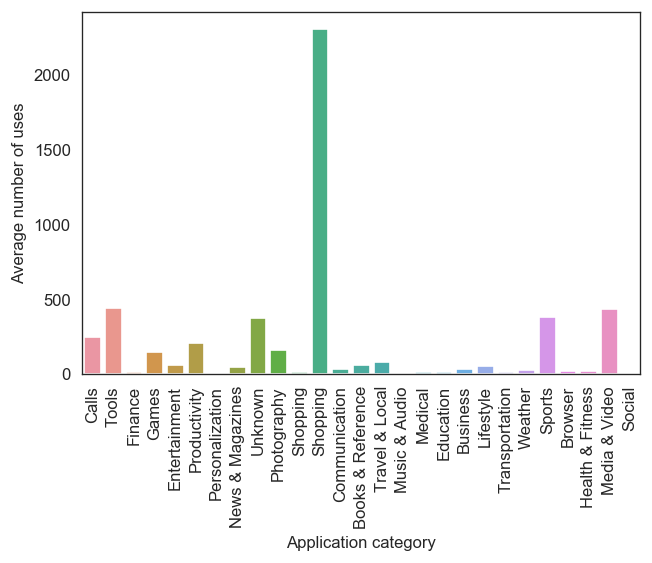

In [1136]:
labels = ['Calls','Tools','Finance','Games','Entertainment','Productivity',
          'Personalization','News & Magazines','Unknown','Photography','Shopping',
          'Shopping','Communication','Books & Reference','Travel & Local','Music & Audio',
          'Medical','Education','Business','Lifestyle','Transportation','Weather','Sports',
          'Browser','Health & Fitness', 'Media & Video', 'Social', 'Comics']

ax = sns.barplot(x=df_categories_freq_mean.index, y=df_categories_freq_mean.values)
ax.set_xticklabels(rotation=90, labels=labels)
plt.xlabel("Application category")
plt.ylabel("Average number of uses")
plt.show(ax)

In [1137]:
df_categories_dur = df.loc[:,'mydatatest.avg_duration_calls':'dur_Comics'].copy()
df_categories_dur.head(2)

,mydatatest.avg_duration_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics
1,80.508333,19.989234,0.0,474.149741,66.142812,27.299807,0.0,63.482948,5.594866,22.306456,62.541808,60.222363,102.0,66.640780,19.273367,0.0,35.316076,4.000000,60.666667,55.469027,0.0,124.447371,72.502856,125.382997,140.0,0.000000,0.0
2,176.214286,21.201236,77.0,0.000000,292.695366,29.823646,0.0,0.000000,2.149066,16.753147,90.804380,42.197411,52.0,53.702947,0.000000,0.0,0.000000,24.285714,0.000000,74.587645,0.0,0.000000,95.829110,0.000000,0.0,82.581954,0.0


In [1138]:
df_categories_dur_mean = df_categories.mean(axis = 0, skipna = True)
df_categories_dur_mean

mydatatest.avg_duration_calls    103.729555
dur_Tools                         16.541400
dur_Finance                       11.371972
dur_Games                        153.330079
dur_Entertainment                 94.005113
dur_Productivity                  23.472882
dur_Personalization                4.348049
dur_News...Magazines              36.655824
dur_Unknown                        4.363831
dur_Photography                   23.917920
dur_Shopping                      33.203324
dur_Communication                 31.276671
dur_Books...Reference             31.238918
dur_Travel...Local                55.909233
dur_Music...Audio                 15.367923
dur_Medical                        2.147814
dur_Education                     32.851426
dur_Business                      36.405302
dur_Lifestyle                     24.790996
dur_Transportation                39.471704
dur_Weather                       10.653809
dur_Sports                        18.179038
dur_Browser                     

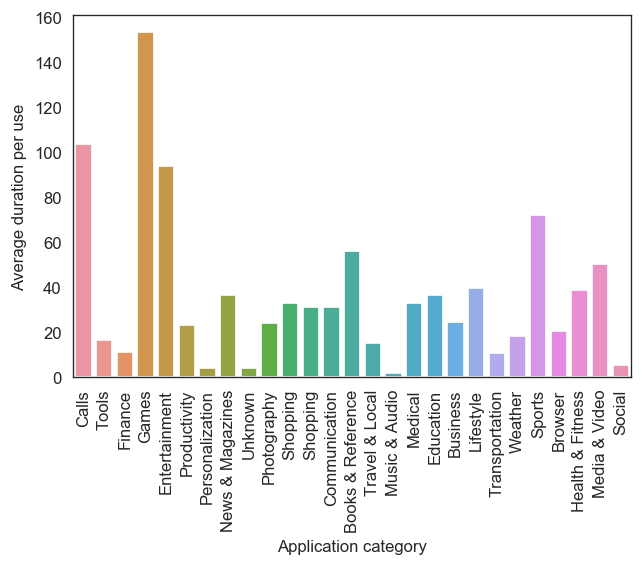

In [1139]:
labels = ['Calls','Tools','Finance','Games','Entertainment','Productivity',
          'Personalization','News & Magazines','Unknown','Photography','Shopping',
          'Shopping','Communication','Books & Reference','Travel & Local','Music & Audio',
          'Medical','Education','Business','Lifestyle','Transportation','Weather','Sports',
          'Browser','Health & Fitness', 'Media & Video', 'Social', 'Comics']

ax = sns.barplot(x=df_categories_dur_mean.index, y=df_categories_dur_mean.values)
ax.set_xticklabels(rotation=90, labels=labels)
plt.xlabel("Application category")
plt.ylabel("Average duration per use")
plt.show(ax)

In [1140]:
print(df_categories_freq_mean.shape[0] + df_categories_dur_mean.shape[0] + 1) # 1 is the fluidIQ

55


In [1141]:
df_dependent_var = df[['Emotional.Stability..N.','Extraversion..E.','Openness..O.',
                                    'Conscientiousness..C.','Agreeableness..A.']].copy()
personality_traits_labels = ['Emotional Stability','Extraversion','Openness', 'Conscientiousness','Agreeableness']

df_dependent_var.columns = personality_traits_labels

df_dependent_var.describe()

,Emotional Stability,Extraversion,Openness,Conscientiousness,Agreeableness
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,-0.042369,0.028110,0.014118,0.078236,-0.155520
std,0.704431,0.738225,0.719639,0.771432,0.751646
min,-1.995500,-1.976000,-1.841000,-1.625900,-2.109900
25%,-0.420000,-0.462800,-0.496600,-0.433400,-0.632900
50%,-0.047500,-0.000700,-0.112800,0.059000,-0.189000
75%,0.430300,0.486100,0.441600,0.601800,0.282200
max,2.520100,1.876400,2.117600,1.814300,1.800900


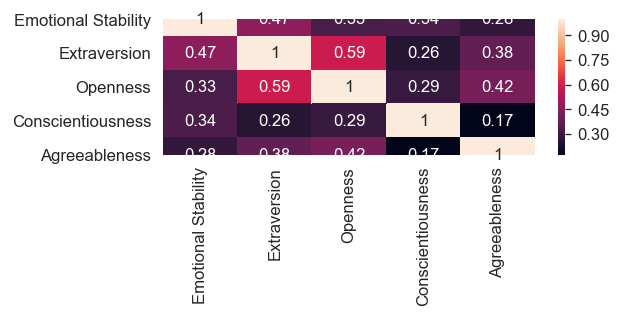

In [1142]:
plt.figure(figsize=(5,1.5))
sns.heatmap(df_dependent_var.corr(), annot=True)

In [1143]:
# More open individuals tend to be more extroverted - corr 0.586
df_dependent_var.corr()

,Emotional Stability,Extraversion,Openness,Conscientiousness,Agreeableness
Emotional Stability,1.000000,0.466411,0.330481,0.337933,0.281577
Extraversion,0.466411,1.000000,0.586026,0.255220,0.381179
Openness,0.330481,0.586026,1.000000,0.294319,0.423569
Conscientiousness,0.337933,0.255220,0.294319,1.000000,0.170422
Agreeableness,0.281577,0.381179,0.423569,0.170422,1.000000


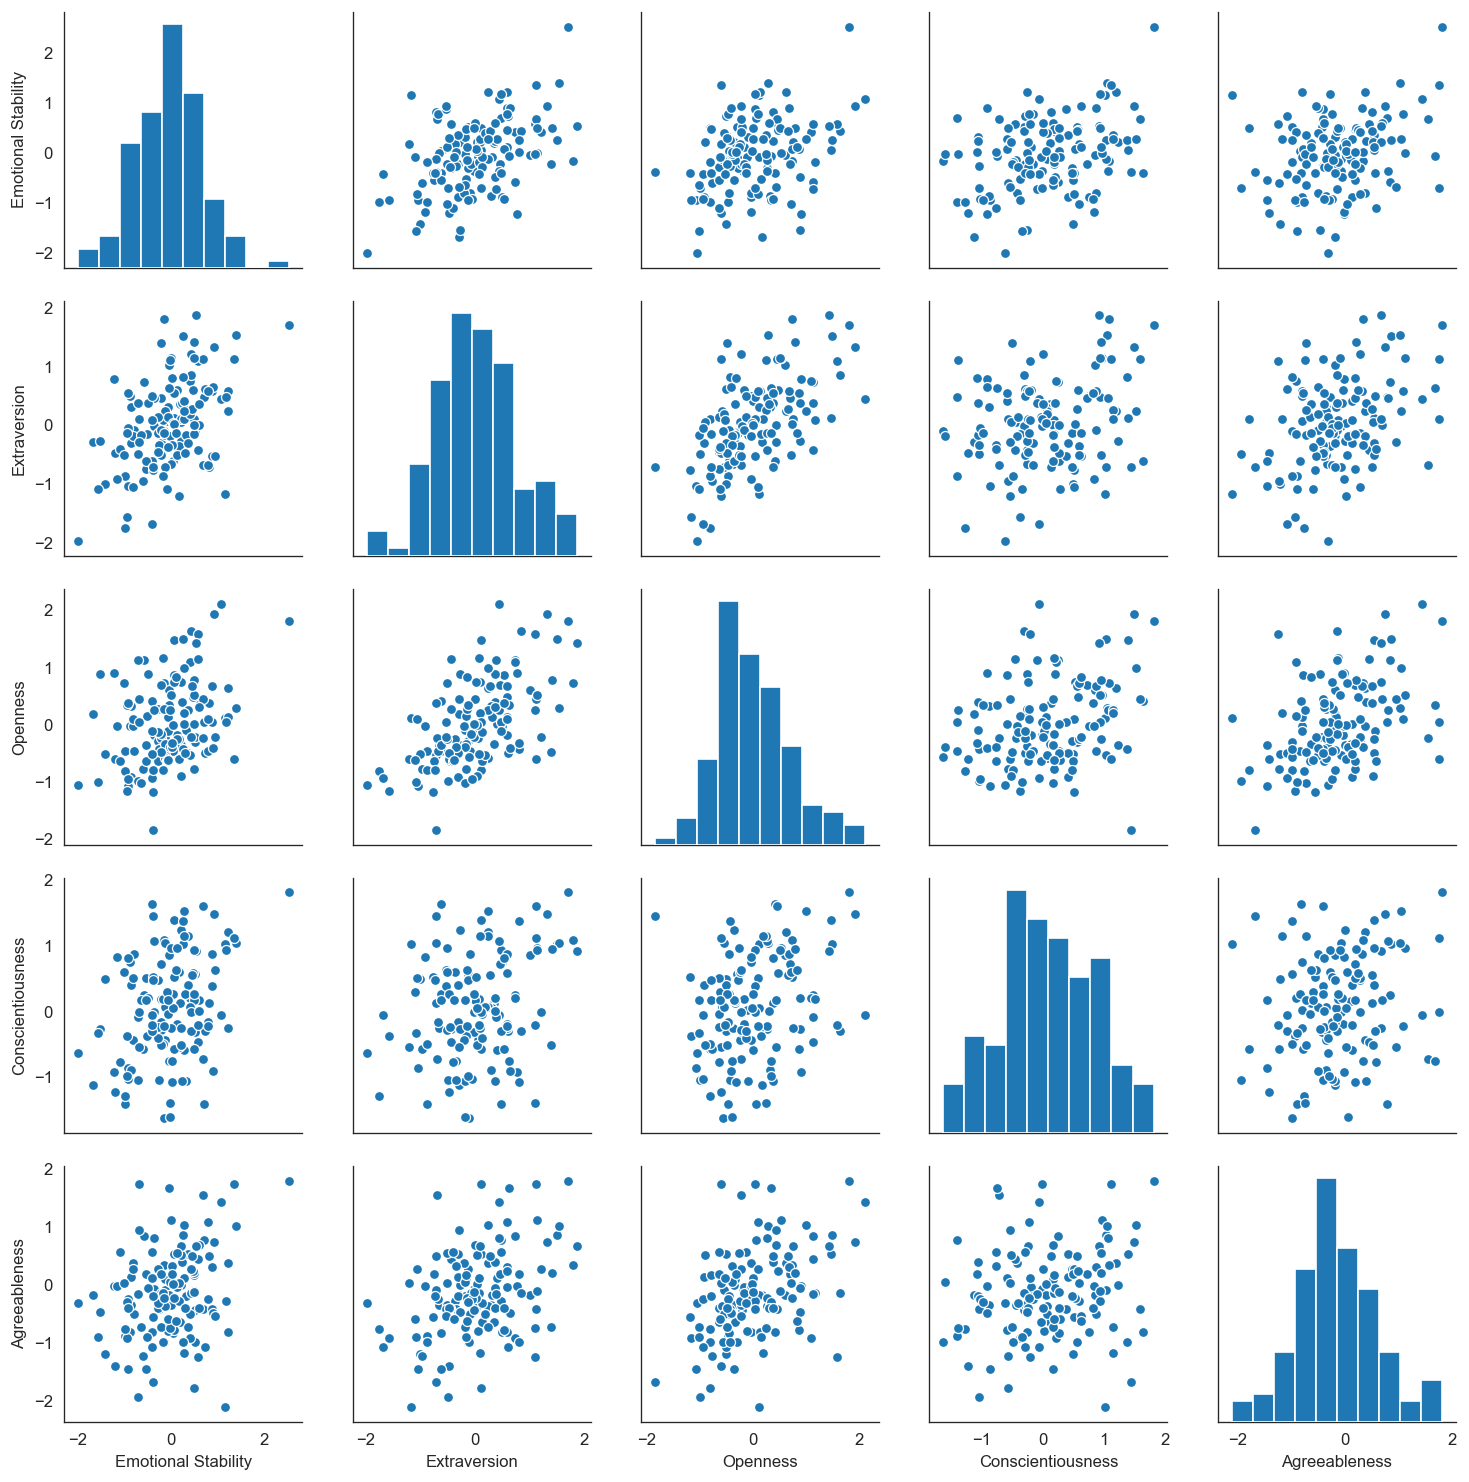

In [1144]:
ax = sns.pairplot(df_dependent_var)
plt.show(ax)

## Distribute into binary classes (0 or 1) for each trait

The median (50th percentile) is used to split the data between low and high tendencies of each personality trait (e.g., extraversion)

+ Low: 0
+ High: 1

In [1145]:
# Eliminate the unnecessary columns 
df_binary = df.copy()
df_binary.drop(['Carefreeness..N1.','Equanimity..N2.','Positive.mood..N3.','Self.consciousness..N4.',
        'Self.control..N5.','Emot..robustness..N6.',
        'Friendliness..E1.','Sociableness..E2.', 'Assertiveness..E3.','Dynamism..E4.','Adventurousness...E5.',
        'Cheerfulness..E6.','Openn..to.imagin...O1.', 'Openn..to.aesth...O2.','Openn..to.feel...O3.',
        'Openn..to.actions..O4.', 'Openn..to.ideas..O5.', 'Openn..to.val..norm...O6.', 
        'Competence..C1.', 'Love.of.order..C2.', 'Sense.of.duty..C3.', 'Ambition..C4.', 'Discipline..C5.', 'Caution..C6.',
        'Willingness.to.trust..A1.', 'Genuineness..A2.', 'Helpfulness..A3.', 'Obligingness..A4.', 
        'Modesty..A5.', 'Good.naturedness..A6.'], axis=1, inplace=True)

df_binary.rename(columns={'Emotional.Stability..N.':'Emotional Stability',
                          'Extraversion..E.':'Extraversion',
                          'Openness..O.':'Openness',
                          'Conscientiousness..C.':'Conscientiousness',
                          'Agreeableness..A.':'Agreeableness'}, inplace=True)

df_binary.head(5)

,ID,Gender,Age,Education_lev,fluidIQ,Emotional Stability,Extraversion,Openness,Conscientiousness,Agreeableness,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics,mydatatest.avg_duration_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics
1,11304,1,23,4,0.7251,-0.9334,-1.0278,-1.0703,-0.8548,-1.4482,120,414,0,40,51,553,0,8,31,260,52,1930,3,128,113,0,11,1,7,153,0,184,231,176,1,8,0,80.508333,19.989234,0.0,474.149741,66.142812,27.299807,0.0,63.482948,5.594866,22.306456,62.541808,60.222363,102.000000,66.640780,19.273367,0.0,35.316076,4.000000,60.666667,55.469027,0.000000,124.447371,72.502856,125.382997,140.0,0.000000,0.0
2,11491,1,21,4,0.9921,1.1622,-1.1607,0.1221,1.0258,-2.1099,98,239,3,0,21,88,0,4,42,113,23,3430,5,19,4,0,0,7,0,34,0,0,187,0,1,211,0,176.214286,21.201236,77.0,0.000000,292.695366,29.823646,0.0,0.000000,2.149066,16.753147,90.804380,42.197411,52.000000,53.702947,0.000000,0.0,0.000000,24.285714,0.000000,74.587645,0.000000,0.000000,95.829110,0.000000,0.0,82.581954,0.0
3,12552,2,22,5,0.5541,-1.6827,-0.2877,0.1810,-1.1241,-0.1796,226,135,0,347,6,75,0,9,6,40,19,1068,12,20,2,0,69,3,0,47,0,0,101,0,0,277,0,84.902655,27.019119,0.0,178.964202,0.000000,32.312866,0.0,95.700334,5.062647,38.577362,39.389153,25.361692,35.660060,149.456141,20.000000,0.0,239.753781,3.666667,0.000000,65.977454,0.000000,0.000000,86.099052,0.000000,0.0,78.253432,0.0
4,13275,2,34,5,0.7387,-0.9873,-0.8691,-0.4643,-1.4071,-0.8839,89,157,0,0,41,75,2,4,3625,102,0,3140,256,108,21,0,0,9,0,3,108,0,263,53,4,118,0,35.314607,20.677723,0.0,0.000000,84.173028,31.069522,99.0,0.000000,3.227029,17.030655,0.000000,41.059489,30.193285,42.857908,15.253427,0.0,0.000000,11.405742,0.000000,2.000000,28.180582,0.000000,50.146309,37.600068,0.0,63.630655,0.0
5,13604,2,23,4,0.9785,0.1927,0.3674,-0.3404,0.1243,-0.6329,244,140,0,164,20,140,1,0,3284,266,0,2153,14,141,13,0,0,0,0,6,72,0,363,0,10,15,0,98.163934,8.812732,0.0,43.500911,3.621455,14.409825,6.0,0.000000,2.502265,11.132798,0.000000,26.968565,67.712688,48.223207,2.245006,0.0,0.000000,0.000000,0.000000,77.333333,3.812671,0.000000,30.335529,0.000000,9.0,16.400009,0.0


In [1146]:
# Calculate the median for each personality trait
df_median = df_binary.loc[:,'Emotional Stability':'Agreeableness'].copy()
df_median = df_median.median()

df_median

Emotional Stability   -0.0475
Extraversion          -0.0007
Openness              -0.1128
Conscientiousness      0.0590
Agreeableness         -0.1890
dtype: float64

In [1147]:
# Renumerate the values below the median with 0 and above with 1
# Run only once 
for column_name in ['Emotional Stability','Extraversion','Openness', 'Conscientiousness','Agreeableness']:
    df_binary.loc[df_binary[column_name] >= df_median[column_name], column_name] = 1
    df_binary.loc[df_binary[column_name] < df_median[column_name], column_name] = 0
    df_binary[column_name] = df_binary[column_name].astype(int)

print(df_binary['Extraversion'].value_counts())

df_binary.head(2)

1    69
0    68
Name: Extraversion, dtype: int64


,ID,Gender,Age,Education_lev,fluidIQ,Emotional Stability,Extraversion,Openness,Conscientiousness,Agreeableness,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics,mydatatest.avg_duration_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics
1,11304,1,23,4,0.7251,0,0,0,0,0,120,414,0,40,51,553,0,8,31,260,52,1930,3,128,113,0,11,1,7,153,0,184,231,176,1,8,0,80.508333,19.989234,0.0,474.149741,66.142812,27.299807,0.0,63.482948,5.594866,22.306456,62.541808,60.222363,102.0,66.640780,19.273367,0.0,35.316076,4.000000,60.666667,55.469027,0.0,124.447371,72.502856,125.382997,140.0,0.000000,0.0
2,11491,1,21,4,0.9921,1,0,1,1,0,98,239,3,0,21,88,0,4,42,113,23,3430,5,19,4,0,0,7,0,34,0,0,187,0,1,211,0,176.214286,21.201236,77.0,0.000000,292.695366,29.823646,0.0,0.000000,2.149066,16.753147,90.804380,42.197411,52.0,53.702947,0.000000,0.0,0.000000,24.285714,0.000000,74.587645,0.0,0.000000,95.829110,0.000000,0.0,82.581954,0.0


## Machine Learning Algorithms

In [1148]:
# Required dependencies 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble
import sklearn.preprocessing

from sklearn.metrics import accuracy_score

#### Extroversion Personality Trait

In [1268]:
# Copy dataframe
data = df_binary.copy()

# Extraversion
trait = 'Extraversion'

data.drop(columns=['ID','Emotional Stability','Openness','Conscientiousness','Agreeableness'], inplace=True)

# Move target trait to the end
extraversion_column = data.pop(trait) # remove column
data[trait]= extraversion_column # append to the end


for index in range(0,data.shape[1]-1):
    data.iloc[:,[index]] = data.iloc[:, [index]].astype(float)

# Get feature columns name
feature_names = data.columns.values
feature_names = np.delete(feature_names,58) # Remove last column (i.e., target)

data.to_csv('data_treated/ml_extroverted_trait.csv')

    
print(data.shape)    
data.head(2)

(137, 59)


,Gender,Age,Education_lev,fluidIQ,freq_calls,freq_Tools,freq_Finance,freq_Games,freq_Entertainment,freq_Productivity,freq_Personalization,freq_News...Magazines,freq_Unknown,freq_Photography,freq_Shopping,freq_Communication,freq_Books...Reference,freq_Travel...Local,freq_Music...Audio,freq_Medical,freq_Education,freq_Business,freq_Lifestyle,freq_Transportation,freq_Weather,freq_Sports,freq_Browser,freq_Health...Fitness,freq_Media...Video,freq_Social,freq_Comics,mydatatest.avg_duration_calls,dur_Tools,dur_Finance,dur_Games,dur_Entertainment,dur_Productivity,dur_Personalization,dur_News...Magazines,dur_Unknown,dur_Photography,dur_Shopping,dur_Communication,dur_Books...Reference,dur_Travel...Local,dur_Music...Audio,dur_Medical,dur_Education,dur_Business,dur_Lifestyle,dur_Transportation,dur_Weather,dur_Sports,dur_Browser,dur_Health...Fitness,dur_Media...Video,dur_Social,dur_Comics,Extraversion
1,1.0,23.0,4.0,0.7251,120.0,414.0,0.0,40.0,51.0,553.0,0.0,8.0,31.0,260.0,52.0,1930.0,3.0,128.0,113.0,0.0,11.0,1.0,7.0,153.0,0.0,184.0,231.0,176.0,1.0,8.0,0.0,80.508333,19.989234,0.0,474.149741,66.142812,27.299807,0.0,63.482948,5.594866,22.306456,62.541808,60.222363,102.0,66.640780,19.273367,0.0,35.316076,4.000000,60.666667,55.469027,0.0,124.447371,72.502856,125.382997,140.0,0.000000,0.0,0
2,1.0,21.0,4.0,0.9921,98.0,239.0,3.0,0.0,21.0,88.0,0.0,4.0,42.0,113.0,23.0,3430.0,5.0,19.0,4.0,0.0,0.0,7.0,0.0,34.0,0.0,0.0,187.0,0.0,1.0,211.0,0.0,176.214286,21.201236,77.0,0.000000,292.695366,29.823646,0.0,0.000000,2.149066,16.753147,90.804380,42.197411,52.0,53.702947,0.000000,0.0,0.000000,24.285714,0.000000,74.587645,0.0,0.000000,95.829110,0.000000,0.0,82.581954,0.0,0


In [1257]:
# Convert to numpy array
data = data.values

# Get last index (target, which is the trait)
target_index = data.shape[1] - 1 

data.shape

(137, 59)

In [1258]:
y = data[:,target_index]
le = sklearn.preprocessing.LabelEncoder()
le.fit(y)
labels = le.transform(y) 
class_names = le.classes_ # array([0., 1.])
data = data[:,:-1]

categorical_features = [1, 2] # Gender and Education_lev, remaining ones are numerical

categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_

data = data.astype(float)

encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=categorical_features)

In [1259]:
# Split the data into training and test sets 

np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)

encoder.fit(data)
encoded_train = encoder.transform(X_train)

print(X_train.shape)
print(X_test.shape)

(102, 58)
(35, 58)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [1260]:
# The y_train and y_test contain each of the personality traits

In [1261]:
# ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
# The default is 100 max interations, we changed to 800 
lr_clf_es = LogisticRegression(random_state=0, C=0.001,max_iter=800, solver='lbfgs', multi_class='multinomial')
#lr_clf_es = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
lr_clf_es = lr_clf_es.fit(X_train,y_train)

# Test the model
y_pred = lr_clf_es.predict(X_test)

# Get the accuracy
lr_clf_es_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', lr_clf_es_accuracy)

# LIME requires class probabilities in case of classification example
# Get probability estimates.
#lr_clf_es_proba = lr_clf_es.predict_proba
lr_clf_es_proba = lambda x: lr_clf_es.predict_proba(x).astype(float)

Accuracy: 0.4857142857142857


In [1275]:
# LIME works for different types of data such as text, images, categorical, numerical, ...
import lime
import lime.lime_tabular

# Create the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, # convert from pandas DataFrame to numpy 2d array
    mode='classification',
    feature_names=feature_names, # All columns name
    categorical_features=categorical_features, # Index of categorical features (int)
    categorical_names=categorical_names, 
    # class_names=class_names, # classes (0 and 1)
    class_names=['low', 'high'],
    discretize_continuous=True
)

# Explain an instance
np.random.seed(1)
i = 0
exp = explainer.explain_instance(X_test[i], lr_clf_es_proba, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
X_train.values.shape

In [ ]:
X_test.values.shape

In [ ]:
X_test['Age'].values

In [905]:
lr_clf_es_proba

array([[7.07663297e-01, 2.92336703e-01],
       [1.72169319e-05, 9.99982783e-01],
       [6.79396714e-01, 3.20603286e-01],
       [3.34317430e-01, 6.65682570e-01],
       [9.01185767e-01, 9.88142334e-02],
       [4.50886791e-01, 5.49113209e-01],
       [8.36702760e-01, 1.63297240e-01],
       [2.87204993e-01, 7.12795007e-01],
       [1.53422415e-01, 8.46577585e-01],
       [9.66689888e-01, 3.33101118e-02],
       [1.30782482e-01, 8.69217518e-01],
       [1.43717092e-02, 9.85628291e-01],
       [6.15208610e-01, 3.84791390e-01],
       [9.18941375e-01, 8.10586246e-02],
       [9.69286262e-01, 3.07137376e-02],
       [2.59874303e-01, 7.40125697e-01],
       [7.11464966e-01, 2.88535034e-01],
       [9.22042833e-01, 7.79571668e-02],
       [7.43853277e-01, 2.56146723e-01],
       [8.96775766e-02, 9.10322423e-01],
       [2.75884728e-01, 7.24115272e-01],
       [9.99968698e-01, 3.13024697e-05],
       [3.70368234e-04, 9.99629632e-01],
       [9.03416738e-01, 9.65832618e-02],
       [6.876983

In [940]:
lr_clf_es.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [953]:
y_test[trait].shape

(35,)

In [954]:
y_pred.shape

(35,)

In [956]:
X_test['freq_Communication'].shape

(35,)

In [961]:
len(X_test.values)

35

In [963]:
lr_clf_es_proba

<function __main__.<lambda>(x)>

In [966]:
X_train.columns.values.shape

(58,)

In [978]:
lr_clf_es_proba

<bound method ForestClassifier.predict_proba of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [990]:
lr_clf_es_proba

<function __main__.<lambda>(x)>

In [1199]:
X_test[i].shape

(58,)

In [1211]:
X_test[1].reshape(-1,1)

array([[1.00000000e+00],
       [7.00000000e+00],
       [3.00000000e+00],
       [2.09200000e-01],
       [2.44000000e+02],
       [4.40000000e+01],
       [0.00000000e+00],
       [3.00000000e+00],
       [4.00000000e+00],
       [2.90000000e+01],
       [0.00000000e+00],
       [4.00000000e+00],
       [8.00000000e+00],
       [5.00000000e+00],
       [0.00000000e+00],
       [7.16000000e+02],
       [2.00000000e+00],
       [2.30000000e+01],
       [2.70000000e+01],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.00000000e+00],
       [0.00000000e+00],
       [1.66000000e+02],
       [2.00000000e+00],
       [0.00000000e+00],
       [2.00000000e+00],
       [0.00000000e+00],
       [1.49479508e+02],
       [1.20096846e+01],
       [0.00000000e+00],
       [5.63000000e+02],
       [0.00000000e+00],
       [1.68127888e+01],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.07944602e+00],
